<a href="https://colab.research.google.com/github/Yufanzh/time_series_analysis/blob/main/time_series_analysis_ar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline

In [20]:
# prompt: import statsmodels for autoregression

from statsmodels.tsa.ar_model import AutoReg, ar_select_order


In [21]:
# prompt: read uspopulation.csv into data frame, and check the first 10 rows

data = pd.read_csv('uspopulation.csv', index_col='DATE', parse_dates=True)


In [22]:
data.index.freq = 'MS'

In [23]:
data.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<Axes: xlabel='DATE'>

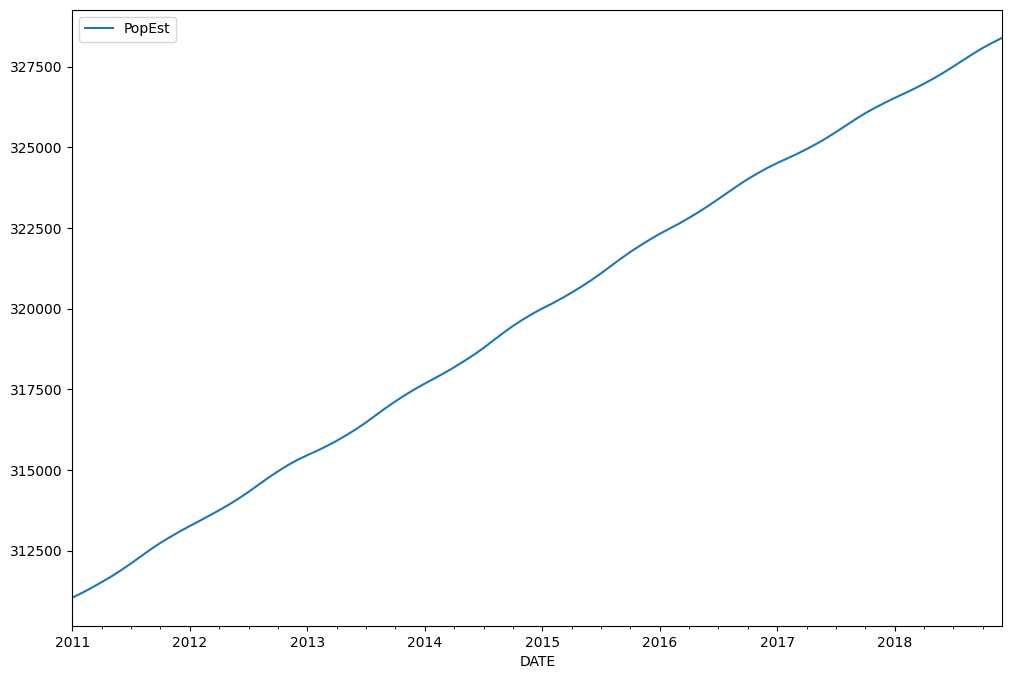

In [24]:
data.plot(figsize=(12,8))

In [25]:
len(data)

96

In [26]:

# prompt: split to training set and test set based on month

train = data.iloc[:84]
test = data.iloc[84:]


In [27]:
# suppress unharmful warming
import warnings
warnings.filterwarnings('ignore')

In [32]:
# prompt: create an autoregression order 1 model

model = AutoReg(endog=train['PopEst'],lags=1)


In [33]:
AR1fit = model.fit()

In [34]:
AR1fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [35]:
start = len(train)
end = len(train) + len(test) - 1

In [36]:
predictions1 = AR1fit.predict(start = start, end = end).rename('AR(1) pred')

<Axes: xlabel='DATE'>

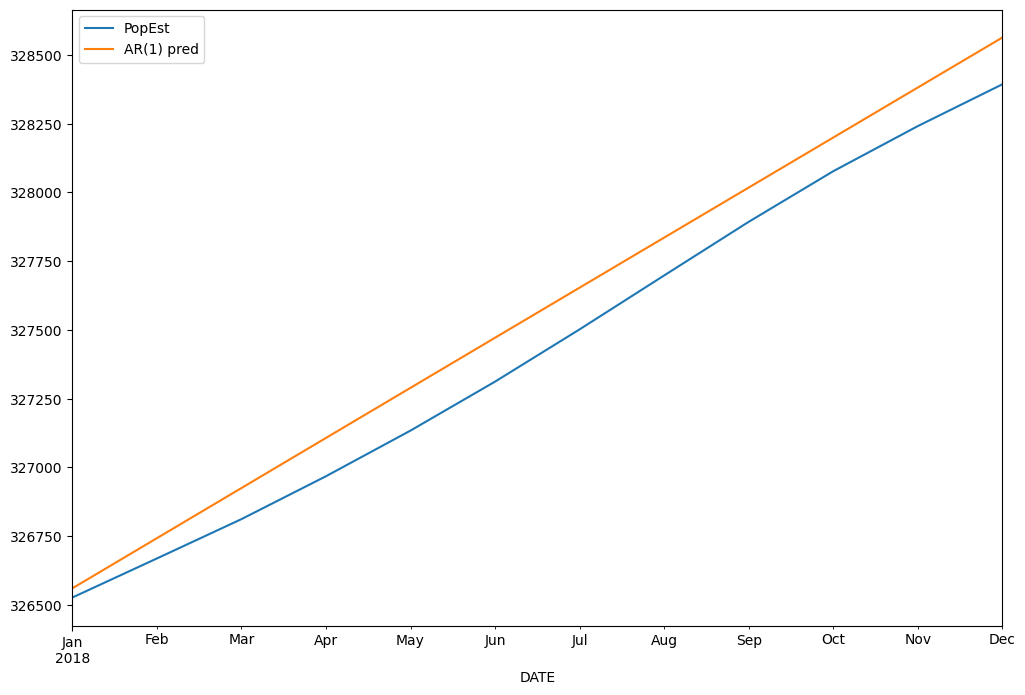

In [37]:
test.plot(figsize=(12,8), legend =True)
predictions1.plot(legend=True)

In [38]:
model2 = AutoReg(endog=train['PopEst'], lags=2)
AR2fit = model2.fit()
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [40]:
predictions2 = AR2fit.predict(start=start, end=end).rename('AR(2) prediction')

<Axes: xlabel='DATE'>

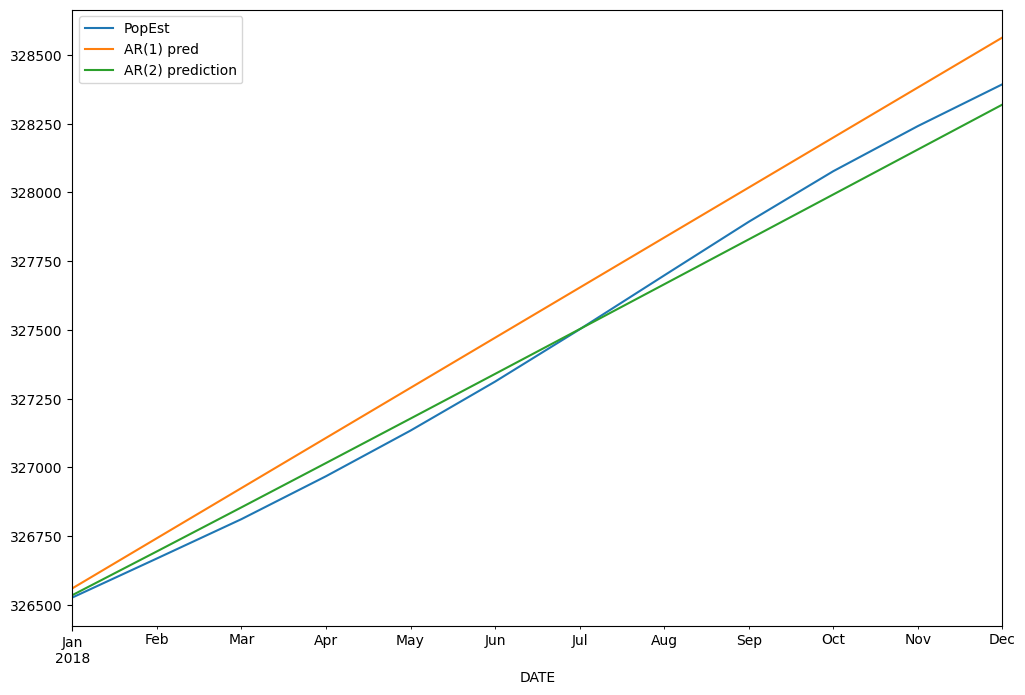

In [41]:
# plot 1, 2 and test dataset together
test.plot(figsize=(12,8), legend =True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)


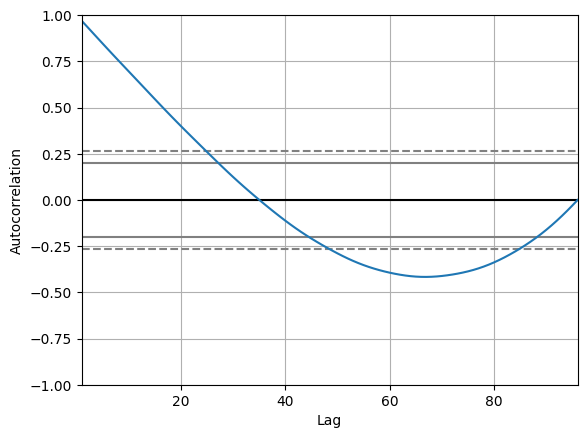

In [10]:
pd.plotting.autocorrelation_plot(data)
plt.show()

In [49]:
search = ar_select_order(endog=train['PopEst'], maxlag=10, ic = 'bic', glob=False)
search.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8]

In [50]:
search.bic

{(1, 2, 3, 4, 5, 6, 7, 8): 490.7938169511855,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): 492.356638982385,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): 493.6071165064917,
 (1, 2, 3, 4, 5): 495.97038258597456,
 (1, 2, 3): 498.0172304504309,
 (1, 2, 3, 4, 5, 6): 498.1177427416975,
 (1, 2, 3, 4, 5, 6, 7): 500.88900486430896,
 (1, 2, 3, 4): 500.9806274483789,
 (1, 2): 593.7570275902789,
 (1,): 688.1215081800357,
 0: 1442.010112924133}

In [51]:
model3 = AutoReg(endog=train, lags=search.ar_lags)

In [52]:
ARautofit = model3.fit()
ARautofit.params

const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64

In [53]:
predictions3 = ARautofit.predict(start=start, end=end).rename('AR(auto) prediction')

<Axes: xlabel='DATE'>

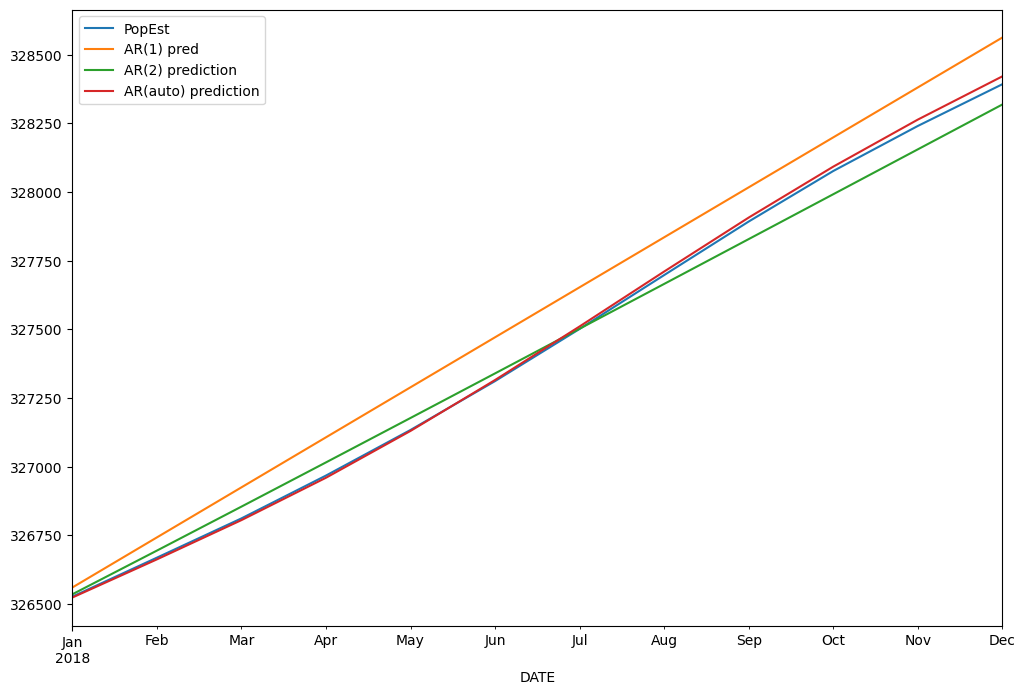

In [54]:
# plot 1, 2, auto and test dataset together
test.plot(figsize=(12,8), legend =True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions3.plot(legend=True)

In [55]:
# evluate the preditions using mean_squared_error
from sklearn.metrics import mean_squared_error

In [57]:
labels = ['AR1', 'AR2', 'AR8']
preds = [predictions1, predictions2, predictions3]

In [59]:
for i in range(3):
  error = mean_squared_error(test['PopEst'], preds[i])
  print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 17449.71423587912
AR2 MSE was : 2713.2585627963244
AR8 MSE was : 186.9732037332336


In [62]:
# true forcasting for 2016
model = AutoReg(data['PopEst'], lags=search.ar_lags)
ARbestfit = model.fit()
forcast_value = ARbestfit.predict(start=len(data), end=len(data)+12).rename('Forecast')

<Axes: xlabel='DATE'>

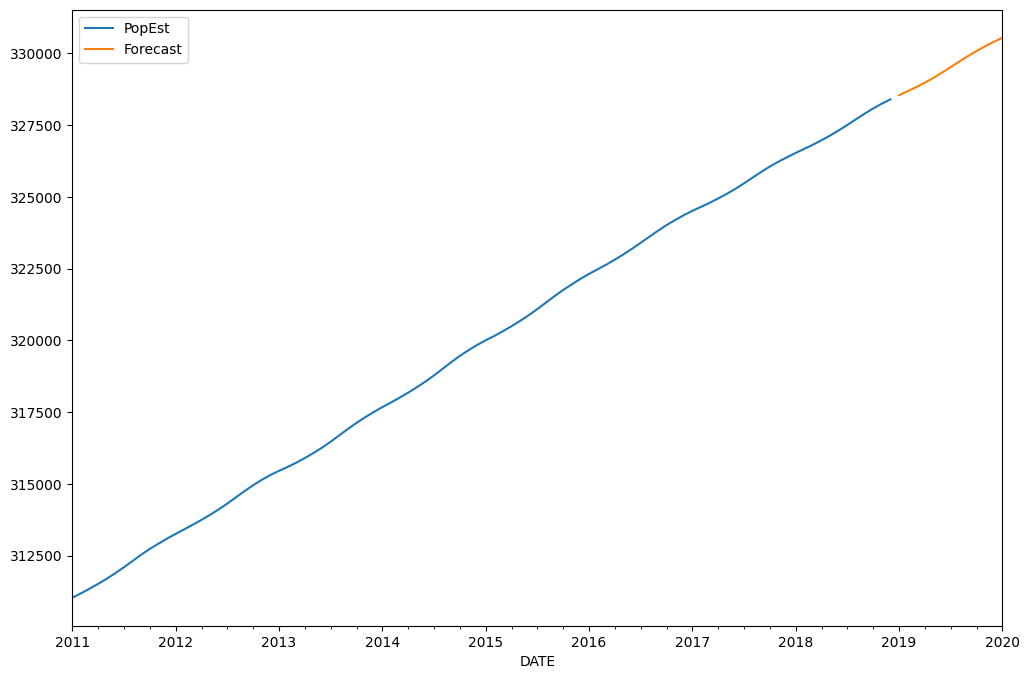

In [63]:
data['PopEst'].plot(figsize=(12,8), legend=True)
forcast_value.plot(legend=True)